In [1]:
import requests
import networkx as nx
import numpy as np
import collections
from networkx.drawing.nx_agraph import graphviz_layout
from time import sleep
import matplotlib.pyplot as plt
import scipy.spatial as spt
from IPython.display import SVG
from pyvis.network import Network
%matplotlib inline

In [72]:
vk_user_id = 84719544 # your vk id
print(f'''1. go to this url: https://oauth.vk.com/authorize?client_id=7993002&display=page&redirect_uri=https://oauth.vk.com/blank.html&scope=friends&response_type=token&v=5.124
2. give access for savn-mipt application
3. copy access_token from redirected url
''')

# enter access token here
access_token="33603c655d5bb6091534503f556bd8cec228b93989770ac746016bf4e53753ad91966cba99bb8cc63b791"

1. go to this url: https://oauth.vk.com/authorize?client_id=7993002&display=page&redirect_uri=https://oauth.vk.com/blank.html&scope=friends&response_type=token&v=5.124
2. give access for savn-mipt application
3. copy access_token from redirected url



In [73]:
# check parser
URL = "https://api.vk.com/method/friends.get?user_id={}&fields=city%2Csex%2Ceducation&v=5.124&access_token={}"
    
r = requests.get(URL.format(vk_user_id, access_token)).json()
r['response']['items'][0]

{'first_name': 'Igor',
 'id': 12831,
 'last_name': 'Slinko',
 'can_access_closed': True,
 'is_closed': False,
 'sex': 2,
 'city': {'id': 1, 'title': 'Moscow'},
 'university': 297,
 'university_name': 'МФТИ (Физтех)',
 'faculty': 2080,
 'faculty_name': 'Факультет управления и прикладной математики',
 'graduation': 2012,
 'education_form': 'Full-time',
 'education_status': "Alumnus (Master's)",
 'track_code': '2f16f7dejtY2Pu5RVplRw1MBR4nIOBX_XUBmPgea9lvLkWM_qJbjvTtYjldRlFXHVfSRHT1adZkv'}

In [74]:
def get_friends_ids(user_id, access_token):
    friends_url = "https://api.vk.com/method/friends.get?user_id={}&fields=city%2Csex%2Ceducation&v=5.124&access_token={}"
    json_response = requests.get(friends_url.format(user_id, access_token)).json()
    if json_response.get('error'):
        print(json_response.get('error'))
        return list()
    return json_response[u'response']

In [75]:
graph = {}
friend_ids = get_friends_ids(vk_user_id, access_token)
for friend_id in friend_ids['items']:
    print('Processing id: ', friend_id['id'])
    sleep(0.5)
    try:
        friend_dict = {}
        friend_dict['name'] = friend_id['first_name'] + " " + friend_id['last_name']
        friend_dict['sex'] = friend_id['sex']
        try:
            friend_dict['city'] = friend_id['city']['title']
        except:
            friend_dict['city'] = "0"
        friend_dict['friends'] = [x['id'] for x in get_friends_ids(friend_id['id'], access_token)['items']]
        graph[friend_id['id']] = friend_dict
    except:
        continue
friend_ids_list = [x['id'] for x in friend_ids['items']]


Processing id:  12831
Processing id:  32174
Processing id:  72198
Processing id:  227877
Processing id:  783422
Processing id:  882963
Processing id:  1039850
Processing id:  1489911
{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '1489911'}, {'key': 'fields', 'value': 'city,sex,education'}, {'key': 'v', 'value': '5.124'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
Processing id:  1548489
Processing id:  1669791
Processing id:  1731674
Processing id:  2045169
{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '2045169'}, {'key': 'fields', 'value': 'city,sex,education'}, {'key': 'v', 'value': '5.124'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
Processing id:  2191771
Processing id:  2401496
Processing id:  3941126
Processing id:  4110471
Processing id:  4150681
{'error_code': 18, 'error_msg': 'User was d

In [76]:
G = nx.Graph(directed=False)
for i in graph:
    G.add_node(i, sex=graph[i]['sex'],
                  city=graph[i]['city'],
                  name=graph[i]['name'])
    for j in graph[i]['friends']:
        if i != j and i in friend_ids_list and j in friend_ids_list:
            G.add_edge(i, j)

In [77]:
nx.write_gml(G, "vk.gml")

In [2]:
G = nx.read_gml("vk.gml")

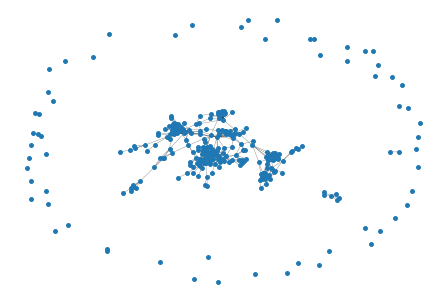

In [3]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=15, with_labels=False, width=0.2)

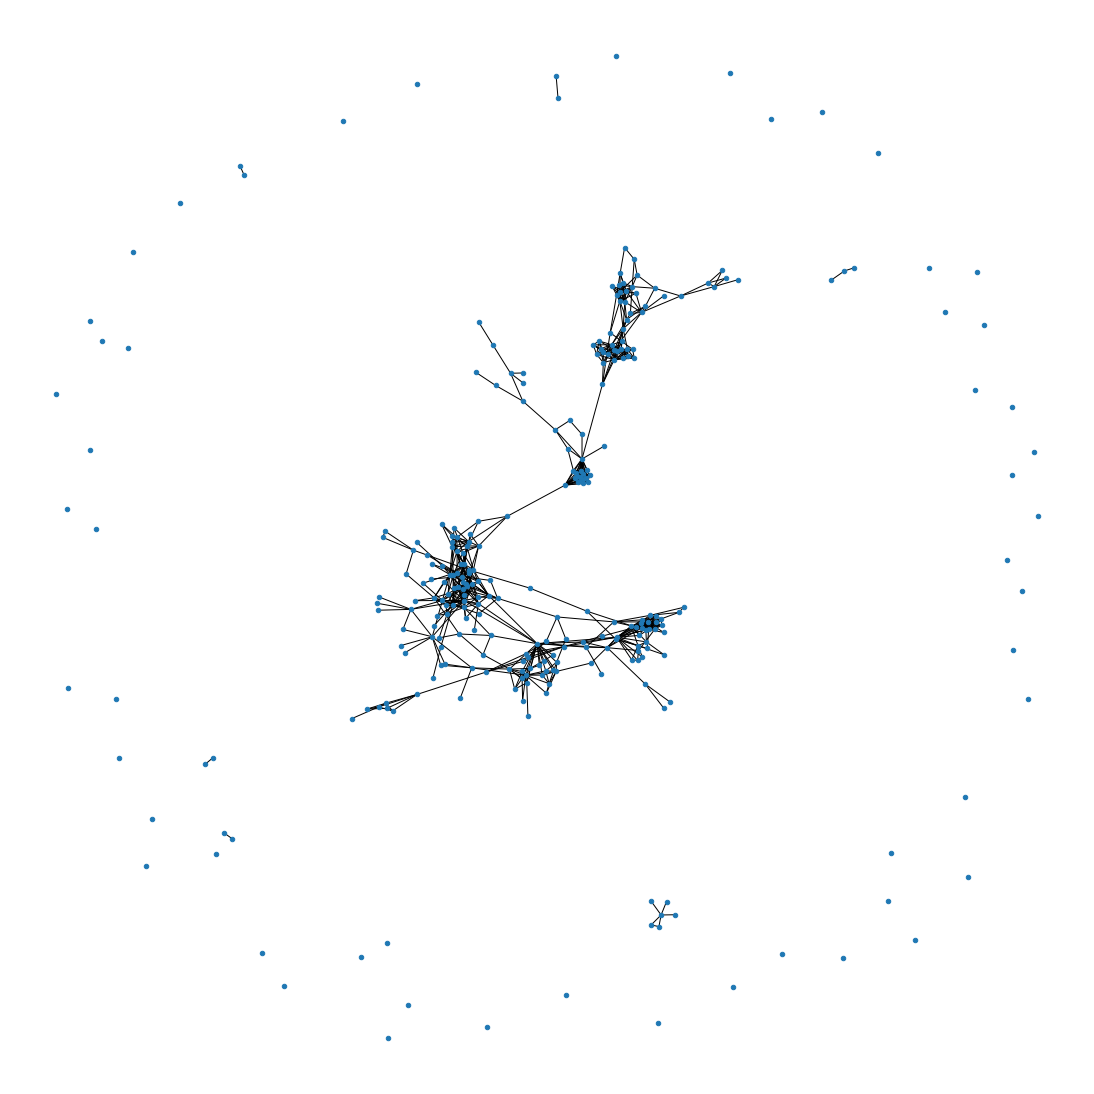

In [4]:
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, iterations=50)
nx.draw(G, pos=pos, node_size=20, cmap=plt.cm.Blues, with_labels=False)

In [5]:
print(f"Social Network has {G.number_of_nodes()} nodes and {G.number_of_edges()} connections between each other")
print(f"Number of connected components = {nx.number_connected_components(G)}")

Social Network has 301 nodes and 748 connections between each other
Number of connected components = 59


In [6]:
nt = Network(notebook=True, height="750px", width="100%", heading="My network")
nt.from_nx(G)
nt.show_buttons(filter_=['physics'])
nt.show("nx.html")

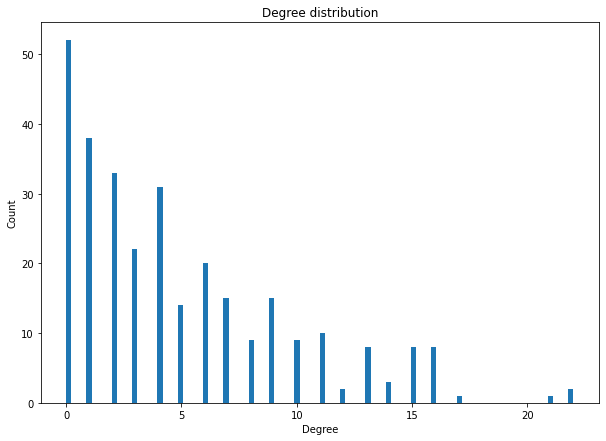

In [7]:
res = np.array([d for n, d in G.degree()])
plt.figure(figsize=(10,7))
plt.title("Degree distribution")
plt.xlabel('Degree')
plt.ylabel('Count')
plt.hist(res, 100)
plt.show()

Text(0.5, 0, 'Degree')

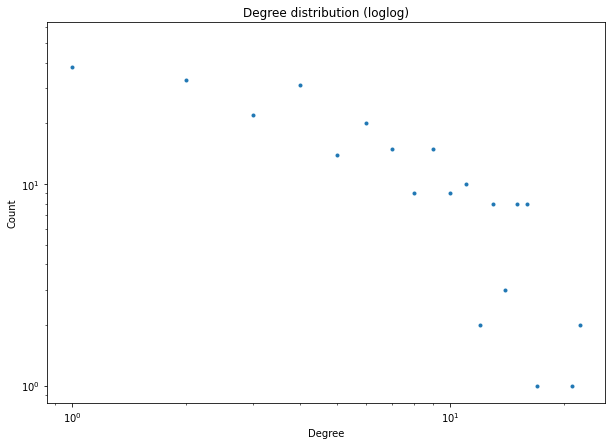

In [8]:
from collections import Counter

plt.figure(figsize=(10,7))
d = Counter(res)
nodes_degree = np.array(list(d.keys())).astype(float)
num = np.array(list(d.values())).astype(float)

plt.loglog(nodes_degree, num, '.', lw=2)
plt.title("Degree distribution (loglog)")
plt.ylabel('Count')
plt.xlabel('Degree')

In [9]:
print(f"Max value of node degree = {np.max(nodes_degree)}")
print(f"Mean value of node degree = {round(np.mean(nodes_degree), 1)}")

print(f'average_clustering = {nx.algorithms.cluster.average_clustering(G)}')

Max value of node degree = 22.0
Mean value of node degree = 9.8
average_clustering = 0.3555986838818575


In [26]:
pathes_lenghs = list(nx.shortest_path_length(G))
lenghs = []

for p in pathes_lenghs:
    for key in list(p)[1]:
        if list(p)[1][key] != 0:
            lenghs.append(list(p)[1][key])

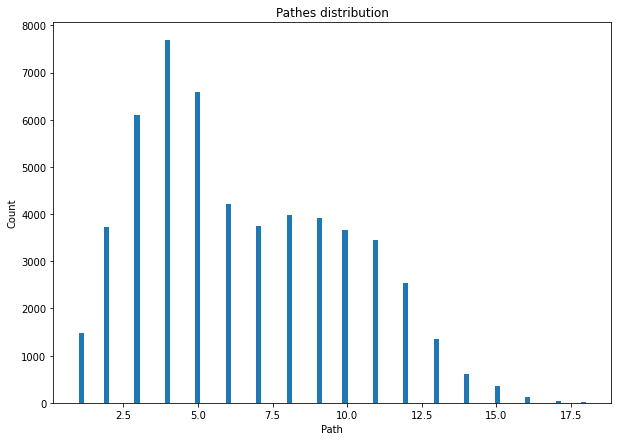

In [28]:
res = np.array([d for d in lenghs])
plt.figure(figsize=(10,7))
plt.title("Pathes distribution")
plt.xlabel('Path')
plt.ylabel('Count')
plt.hist(res, 100)
plt.show()

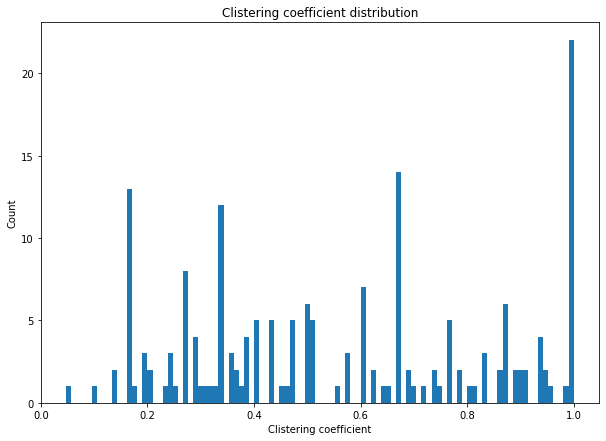

In [44]:
clist = list(nx.algorithms.cluster.clustering(S[0]).values())
res = []
for c in clist:
    if c > 0:
        res.append(c)

res = np.array([d for d in res])
plt.figure(figsize=(10,7))
plt.title("Clistering coefficient distribution")
plt.xlabel('Clistering coefficient')
plt.ylabel('Count')
plt.hist(res, 100)
plt.show()

In [86]:
# Structural Analysis

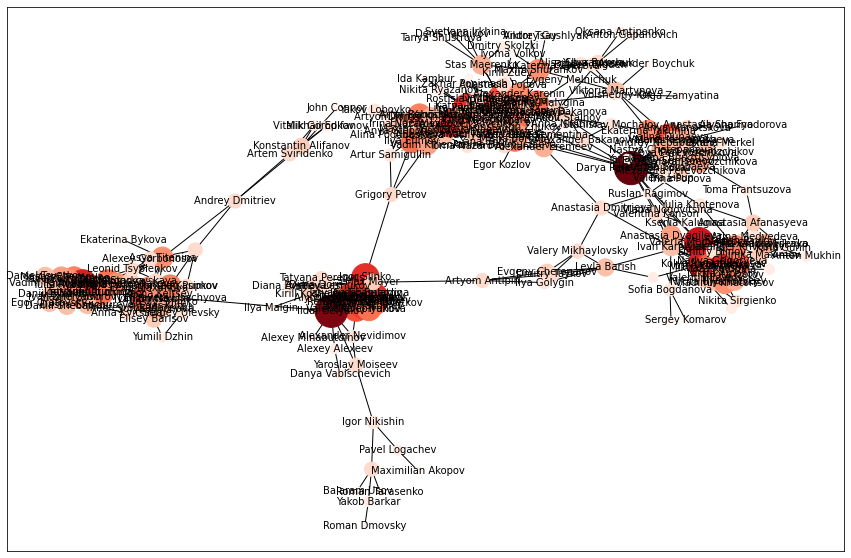

In [13]:
# Subgraphs
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
S = [S[i] for i in range(len(S)) if len(S[i]) > 1]

S_i = S[0]
my_degrees = nx.degree(S_i)
degree_values = [v for k, v in my_degrees]
degree_keys = [k for k, v in my_degrees]
labels = nx.get_node_attributes(S_i, 'name')

plt.figure(1, figsize=(15,10))
nx.draw_networkx(S_i,
                 pos=nx.spring_layout(S_i),
                 nodelist= degree_keys,
                 node_size = [d*50 for d in degree_values],
                 node_color=degree_values,
                 labels=labels,
                 font_size=10,
                 cmap=plt.cm.Reds, with_labels=True)

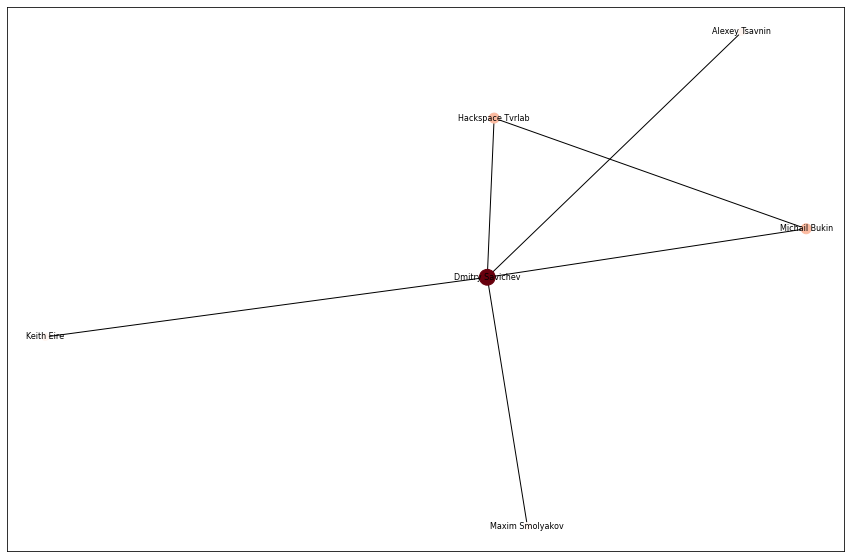

In [88]:
S_i = S[2]
my_degrees = nx.degree(S_i)
degree_values = [v for k, v in my_degrees]
degree_keys = [k for k, v in my_degrees]
labels = nx.get_node_attributes(S_i, 'name')

plt.figure(1, figsize=(15,10))
nx.draw_networkx(S_i,
                 pos=nx.spring_layout(S_i),
                 nodelist= degree_keys,
                 node_size = [d*50 for d in degree_values],
                 node_color=degree_values,
                 labels=labels,
                 font_size=8,
                 cmap=plt.cm.Reds, with_labels=True)

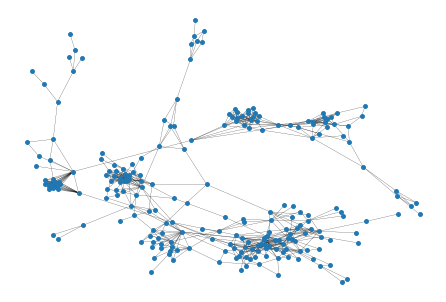

In [89]:
# Find max diameter in subgraphs 
max_diameter = 0
graph_idx = 0
for i in range(len(S)):
    S_i = S[i]
    if nx.diameter(S_i) > max_diameter:
        max_diameter = nx.diameter(S_i)
        graph_idx = i
    
pos = nx.spring_layout(S[graph_idx])
nx.draw(S[graph_idx], pos, node_size=15, with_labels=False, width=0.2)

In [90]:
print(f"Max diameter = {max_diameter}")

Max diameter = 18


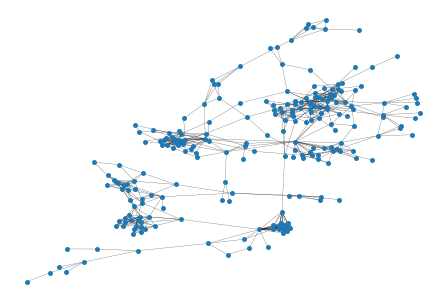

In [91]:
# Find max raduis in subgraphs 
radius = 0
graph_idx = 0
for i in range(len(S)):
    S_i = S[i]
    if nx.radius(S_i) > radius:
        radius = nx.radius(S_i)
        graph_idx = i
    
pos = nx.spring_layout(S[graph_idx])
nx.draw(S[graph_idx], pos, node_size=15, with_labels=False, width=0.2)

In [92]:
print(f"Max radius = {radius}")

Max radius = 9


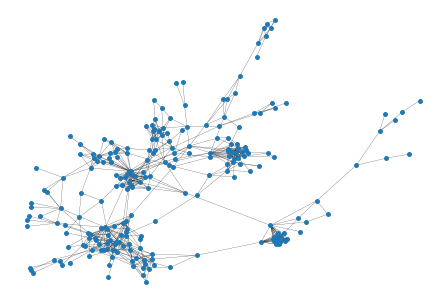

In [93]:
# Find AVG path length in subgraphs 
avg_path = 0
graph_idx = 0
for i in range(len(S)):
    S_i = S[i]
    if nx.average_shortest_path_length(S_i) > avg_path:
        avg_path = nx.average_shortest_path_length(S_i)
        graph_idx = i
    
pos = nx.spring_layout(S[graph_idx])
nx.draw(S[graph_idx], pos, node_size=15, with_labels=False, width=0.2)

In [94]:
print(f"Avg. path length = {avg_path}")

Avg. path length = 6.514517092103299


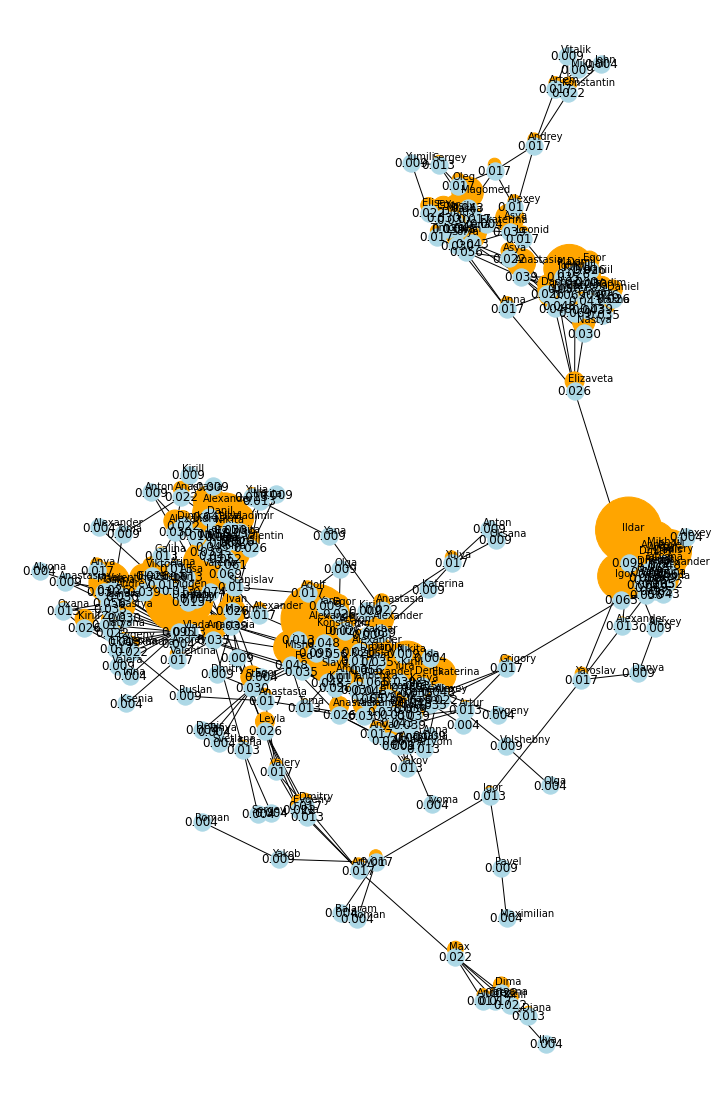

In [95]:
# Degree centrality
centrality = nx.degree_centrality(S[0])

# Create labels dict with fixed digit format
labels = {
    node: '{:.3f}'.format(centrality[node])
    for node in centrality
}

plt.figure(figsize=(20,20))
ax = plt.gca()
ax.set_aspect('equal')

pos = nx.spring_layout(S[0])
nx.draw(S[0], 
        pos=pos,
        node_color='lightblue', 
        labels=labels,
        with_labels=True)

for node, (x,y) in pos.items():
    rad = centrality[node]*0.7
    circle = plt.Circle((x,y+rad), radius=rad, color='orange')
    plt.text(x-.012, y+rad, G.nodes[node].get('name', ". .").split()[0], fontsize=10)
    ax.add_artist(circle)
    
plt.show()

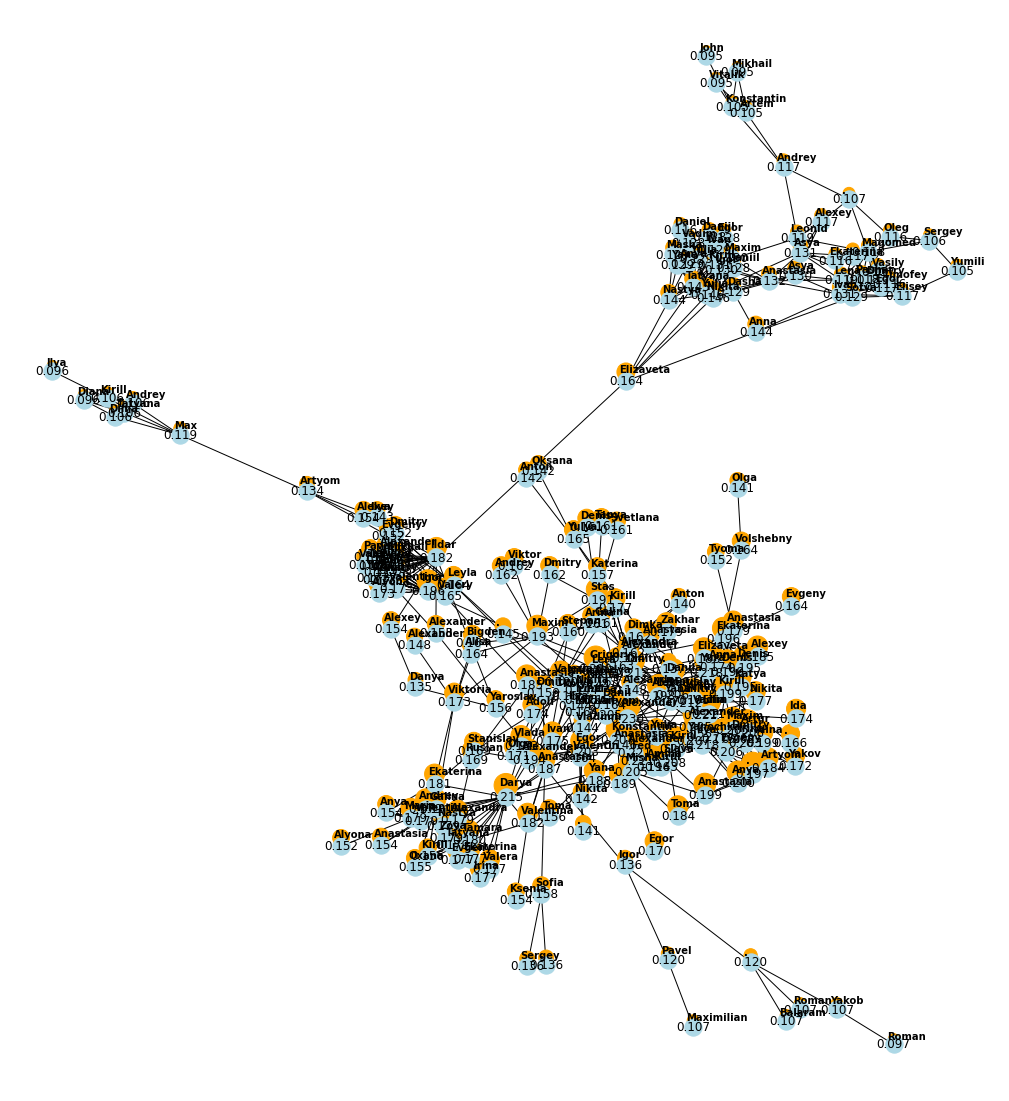

In [96]:
# Closeness centrality
centrality = nx.closeness_centrality(S[0])

# Create labels dict with fixed digit format
labels = {
    node: '{:.3f}'.format(centrality[node])
    for node in centrality
}

plt.figure(figsize=(20,20))
ax = plt.gca()
ax.set_aspect('equal')

pos = nx.spring_layout(S[0])
nx.draw(S[0], 
        pos=pos,
        node_color='lightblue', 
        labels=labels,
        with_labels=True)

for node, (x,y) in pos.items():
    rad = centrality[node]*0.1
    circle = plt.Circle((x,y+rad), radius=rad, color='orange')
    plt.text(x-.012, y+rad, G.nodes[node].get('name', ". .").split()[0], fontsize=10, weight="bold")
    ax.add_artist(circle)
    
plt.show()

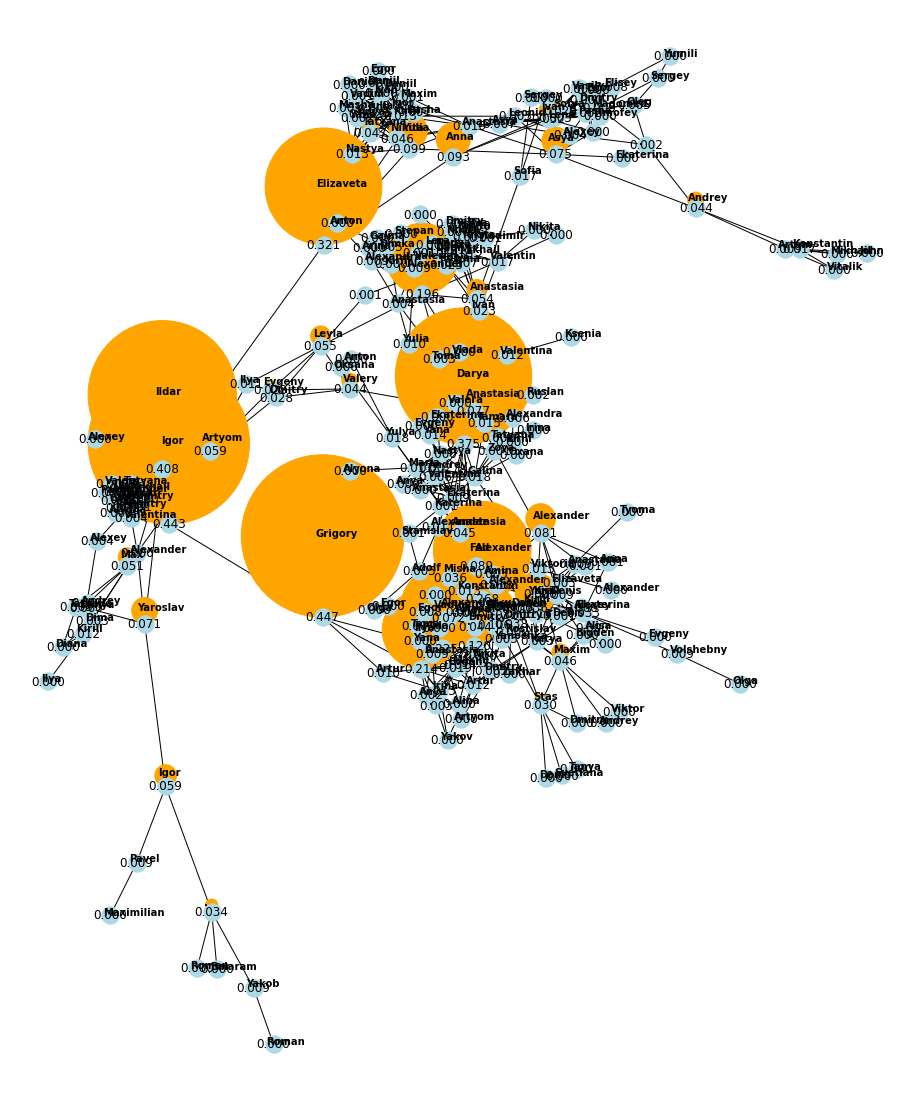

In [97]:
# Betweenness centrality
centrality = nx.betweenness_centrality(S[0])

# Create labels dict with fixed digit format
labels = {
    node: '{:.3f}'.format(centrality[node])
    for node in centrality
}

plt.figure(figsize=(20,20))
ax = plt.gca()
ax.set_aspect('equal')

pos = nx.spring_layout(S[0])
nx.draw(S[0], 
        pos=pos,
        node_color='lightblue', 
        labels=labels,
        with_labels=True)

for node, (x,y) in pos.items():
    rad = centrality[node]*0.3
    circle = plt.Circle((x,y+rad), radius=rad, color='orange')
    plt.text(x-.012, y+rad, G.nodes[node].get('name', ". .").split()[0], fontsize=10, weight="bold")
    ax.add_artist(circle)
    
plt.show()

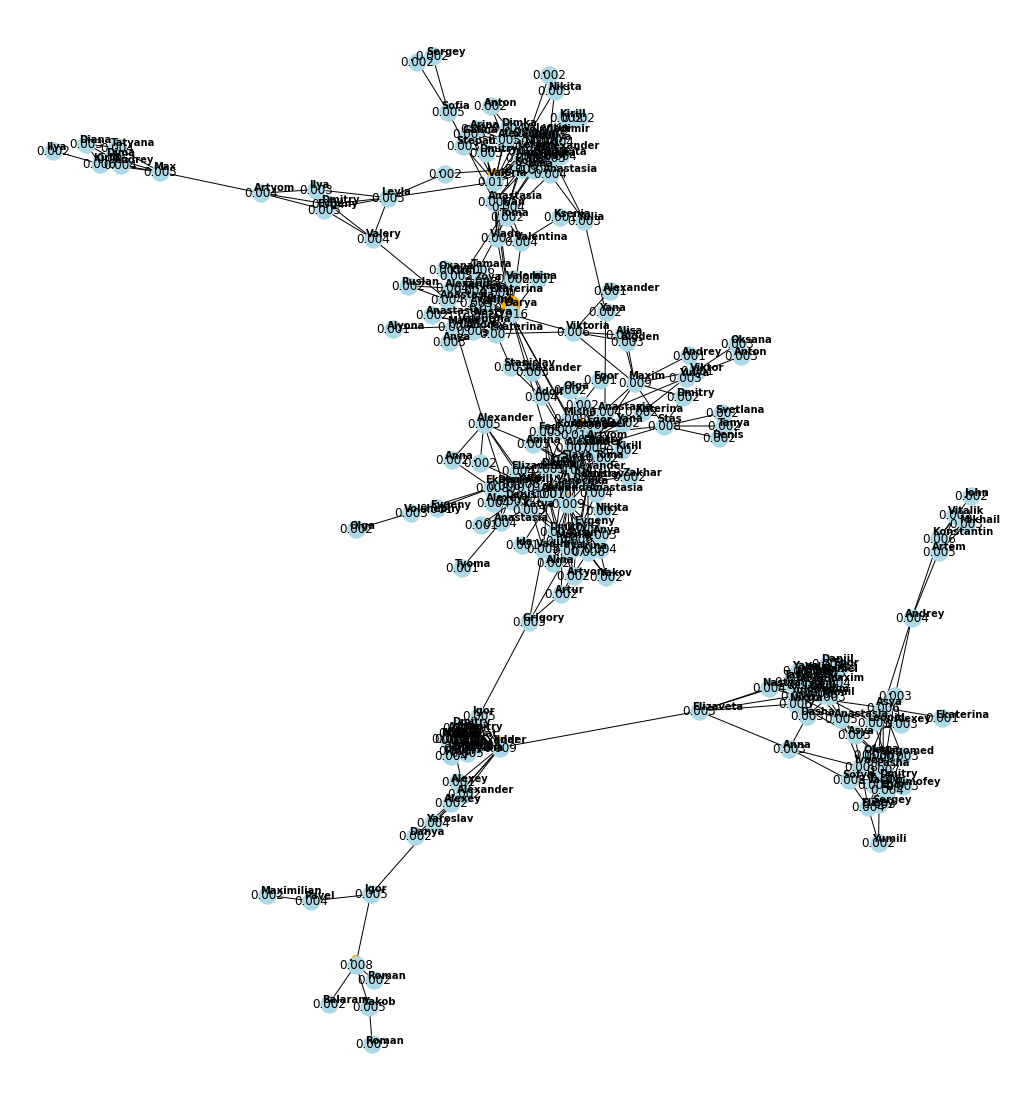

In [98]:
# pagerank
centrality = nx.pagerank(S[0])

# Create labels dict with fixed digit format
labels = {
    node: '{:.3f}'.format(centrality[node])
    for node in centrality
}

plt.figure(figsize=(20,20))
ax = plt.gca()
ax.set_aspect('equal')

pos = nx.spring_layout(S[0])
nx.draw(S[0], 
        pos=pos,
        node_color='lightblue', 
        labels=labels,
        with_labels=True)

for node, (x,y) in pos.items():
    rad = centrality[node]#*0.1
    circle = plt.Circle((x,y+rad), radius=rad, color='orange')
    plt.text(x-.012, y+rad, G.nodes[node].get('name', ". .").split()[0], fontsize=10, weight="bold")
    ax.add_artist(circle)
    
plt.show()

In [99]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
pagerank = nx.pagerank(G)

In [100]:
scores = {"degreeCentrality": degree_centrality, 
         "closenessCentrality": closeness_centrality, 
         "betweennessCentrality": betweenness_centrality,
         "eigenvectorCentrality": eigenvector_centrality, 
         "pagerank": pagerank}

for i, j in scores.items():
    score_ranking_dict = {key: rank for rank, key in enumerate(sorted(j, key = j.get, reverse=True), 1)}
    nx.set_node_attributes(G, j, i)
    nx.set_node_attributes(G, score_ranking_dict, i+'rank')

nx.write_gml(G, 'G_centrality.gml')

In [101]:
# Assortative Mixing according to node attributes
degree_assort = nx.degree_assortativity_coefficient(G)
print(f"Node degree assortativity: {degree_assort}")

Node degree assortativity: 0.26380562836128174


In [193]:
modularity_city = nx.algorithms.assortativity.attribute_assortativity_coefficient(G, "city")
modularity_sex = nx.algorithms.assortativity.attribute_assortativity_coefficient(G, "sex")
print(f"Assortativity coefficient for city: {modularity_city}")
print(f"Assortativity coefficient for sex: {modularity_sex}")

Assortativity coefficient for city: 0.22592200710473684
Assortativity coefficient for sex: 0.13759527579765057


array([[0.16042781, 0.17981283, 0.00802139],
       [0.17981283, 0.41176471, 0.02606952],
       [0.00802139, 0.02606952, 0.        ]])

Text(0.5, 1.0, 'Euclidean dist.')

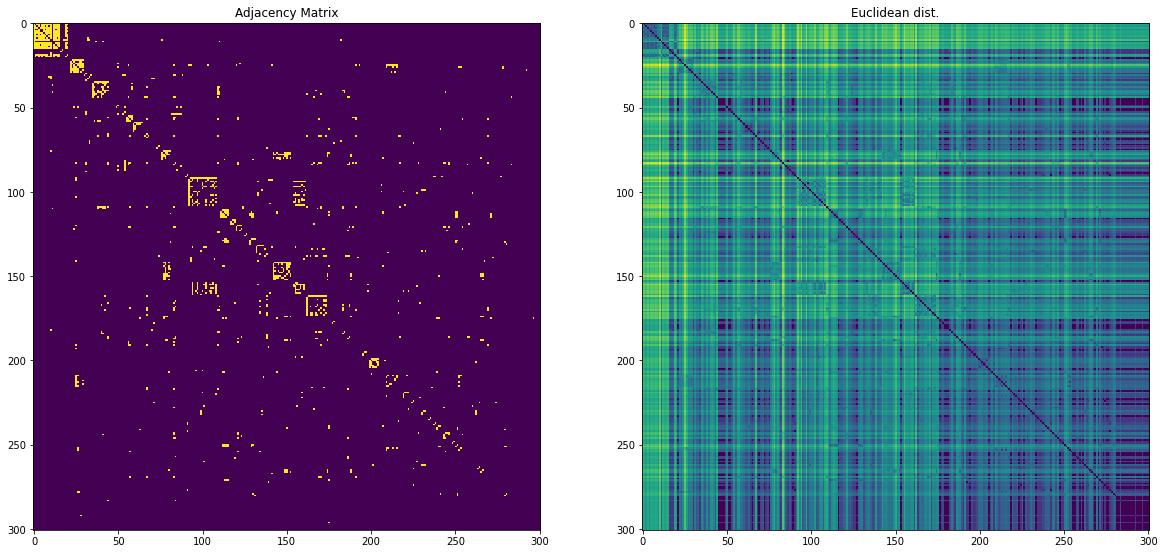

In [103]:
A = nx.to_numpy_matrix(G)
A = np.asarray(A)


# Plot 
plt.figure(figsize=(20, 10))

# plot adj. matrix
plt.subplot(1, 2, 1)
plt.imshow(A, interpolation="None")
plt.title("Adjacency Matrix")

plt.subplot(1, 2, 2)
dVec = spt.distance.pdist(A, metric="euclidean")
D = spt.distance.squareform(dVec)
plt.imshow(D, interpolation="None")
plt.title("Euclidean dist.")

In [133]:
import scipy.stats as stat
import pandas as pd 

deg_val = [v for k, v in G.degree()]

n = nx.number_of_nodes(G)
m = nx.number_of_edges(G)

k = np.mean(deg_val)

## Erdos-Renyi graph model
erdos = nx.erdos_renyi_graph(n, m /float(n*(n-1)/2))
## Barabasi-Albert graph model
barbarasi = nx.barabasi_albert_graph(n, int(m/n))
## Watts-Strogatz graph model
watts = nx.watts_strogatz_graph(n, int(k), 0.1)

erdos_val = [v for k, v in erdos.degree()]
barbarasi_val = [v for k, v in barbarasi.degree()]
watts_val = [v for k, v in watts.degree()]

In [134]:
import scipy
print('Kolmogorov-Smirnov test results between Social network and Erdos-Renyi model -\n{}'.format(scipy.stats.ks_2samp((deg_val), erdos_val)))
print('Kolmogorov-Smirnov test results between Social network and Barabasi-Albert model -\n{}'.format(scipy.stats.ks_2samp((deg_val), barbarasi_val)))
print('Kolmogorov-Smirnov test results between Social network and Watts-Strogatz model -\n{}'.format(scipy.stats.ks_2samp((deg_val), watts_val)))

Kolmogorov-Smirnov test results between Social network and Erdos-Renyi model -
KstestResult(statistic=0.31561461794019935, pvalue=1.1936527662801355e-13)
Kolmogorov-Smirnov test results between Social network and Barabasi-Albert model -
KstestResult(statistic=0.29900332225913623, pvalue=2.842257447079101e-12)
Kolmogorov-Smirnov test results between Social network and Watts-Strogatz model -
KstestResult(statistic=0.4019933554817276, pvalue=4.0307214466312467e-22)


In [135]:
data = [[nx.number_of_edges(S[0]),
         nx.average_clustering(S[0]),
         nx.average_shortest_path_length(S[0]),
         nx.diameter(S[0])],
         #[nx.number_of_edges(erdos),
         #nx.average_clustering(erdos),
         #nx.average_shortest_path_length(erdos),
         #nx.diameter(erdos)],
        [nx.number_of_edges(barbarasi),
         nx.average_clustering(barbarasi),
         nx.average_shortest_path_length(barbarasi),
         nx.diameter(barbarasi)],
        [nx.number_of_edges(watts),
         nx.average_clustering(watts),
         nx.average_shortest_path_length(watts),
         nx.diameter(watts)]]

rows = ['My Social network','Barabasi-Albert model', 'Watts-Strogatz model']
columns = ['# edges', 'Clustering coeff', 'Path length', 'Diameter']
pd.DataFrame(data, rows, columns)

# edges  Clustering coeff  Path length  Diameter
My Social network          736          0.452307     6.514517        18
Barabasi-Albert model      598          0.078567     3.525050         6
Watts-Strogatz model       602          0.380494     7.246667        16

In [ ]:
# Community detection

In [194]:
from networkx.algorithms.community import k_clique_communities
from networkx.algorithms.community import girvan_newman

In [234]:
communities = list(k_clique_communities(S[0], 12))
print(len(communities))

1


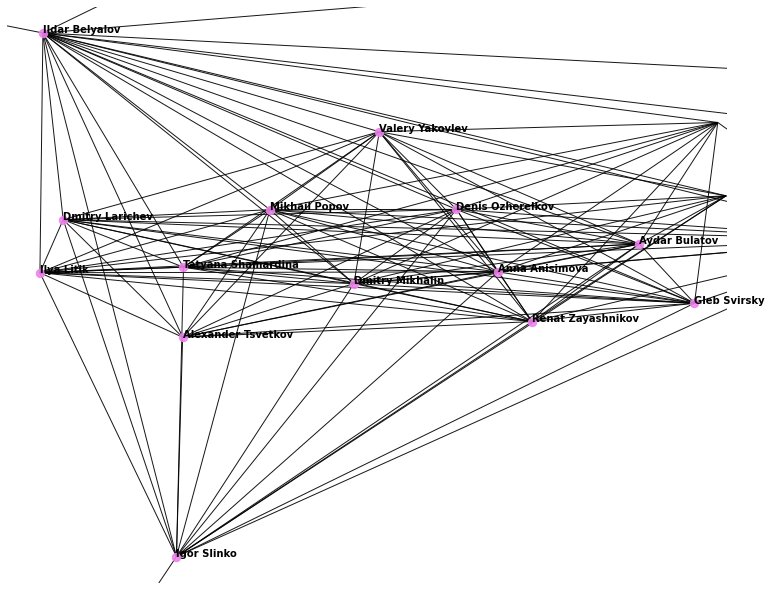

In [235]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(S[0])
colors = ["violet", "black", "orange", "cyan", "blue", "green", "yellow", "indigo", "pink", "red"]
for i in range(len(communities)):
    graph = communities[i]
    node_list = [node for node in graph]
    nx.draw(S[0], pos, nodelist=node_list, node_color=colors[i%10], node_size=70, alpha=0.9)
    for node, (x,y) in pos.items():
        if node not in node_list:
            continue
        rad = centrality[node]#*0.1
        circle = plt.Circle((x,y+rad), radius=rad, color='orange')
        plt.text(x, y, S[0].nodes[node].get('name', ". ."), fontsize=10, weight="bold")
        ax.add_artist(circle)

6


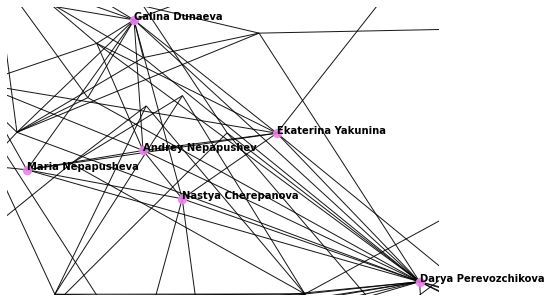

In [251]:
def draw_clique(graph):
    node_list = [node for node in graph]
    nx.draw(S[0], pos, nodelist=node_list, node_color=colors[i%10], node_size=70, alpha=0.9)
    for node, (x,y) in pos.items():
        if node not in node_list:
            continue
        rad = centrality[node]#*0.1
        circle = plt.Circle((x,y+rad), radius=rad, color='orange')
        plt.text(x, y, S[0].nodes[node].get('name', ". ."), fontsize=10, weight="bold")
        ax.add_artist(circle)

communities = list(k_clique_communities(S[0], 6))
print(len(communities))
draw_clique(communities[2])

In [253]:
def k_core_decompose(G):
    ### BEGIN SOLUTION
    return np.array(list(nx.core_number(G).values()))
    ### END SOLUTION

In [254]:
cliques = list(nx.algorithms.clique.find_cliques(G))
max_size = 0
for c in cliques:
    max_size = max(max_size, len(c))
print(f'max clique size = {max_size}')

max clique size = 12


In [255]:
labels = k_core_decompose(S[0])

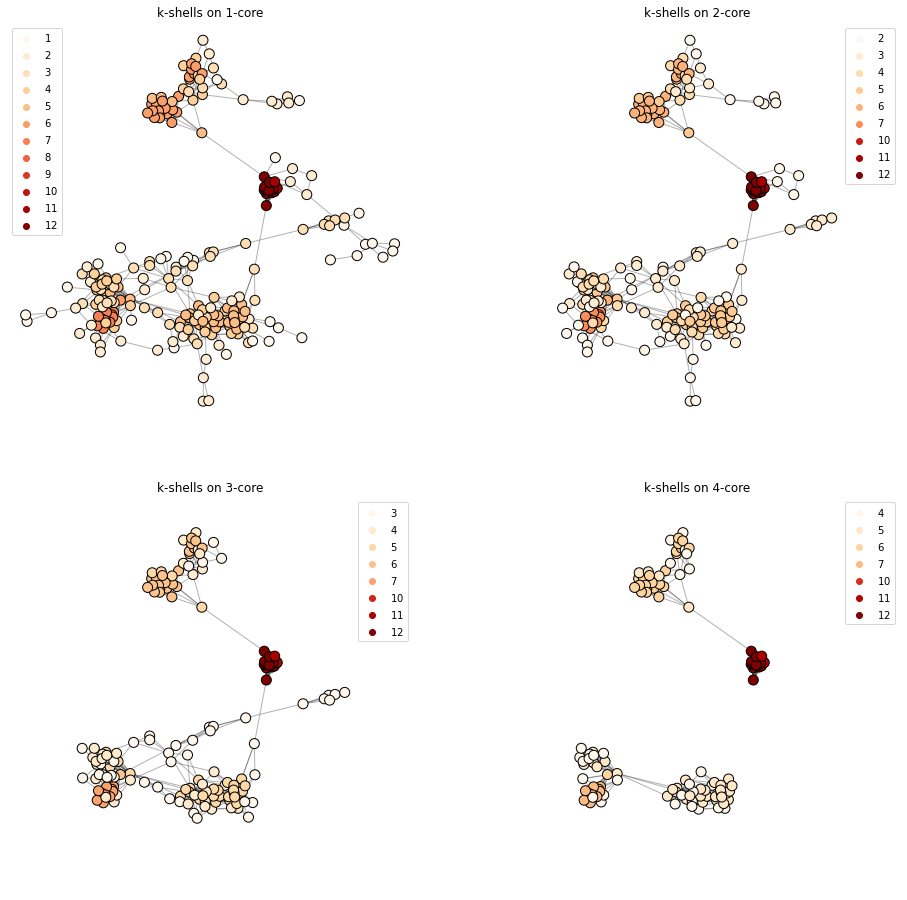

In [258]:
plt.figure(figsize=(8*2, 8*2))

x_max, y_max = np.array(list(pos.values())).max(axis=0)
x_min, y_min = np.array(list(pos.values())).min(axis=0)

for i in range(4):
    plt.subplot(2, 2, i+1)
    subG = nx.k_core(S[0], i+1)
    nodes = nx.draw_networkx_nodes(
        subG, 
        pos,
        cmap=plt.cm.OrRd,
        node_color=k_core_decompose(subG), 
        node_size=100, 
        edgecolors='black'
    )
    nx.draw_networkx_edges(
        subG, 
        pos,
        alpha=0.3,
        width=1, 
        edge_color='black'
    )
    eps = (x_max - x_min) * 0.05
    plt.xlim(x_min-eps, x_max+eps)
    plt.ylim(y_min-eps, y_max+eps)
    plt.legend(*nodes.legend_elements())
    plt.axis('off')
    plt.title('k-shells on {}-core'.format(i+1))

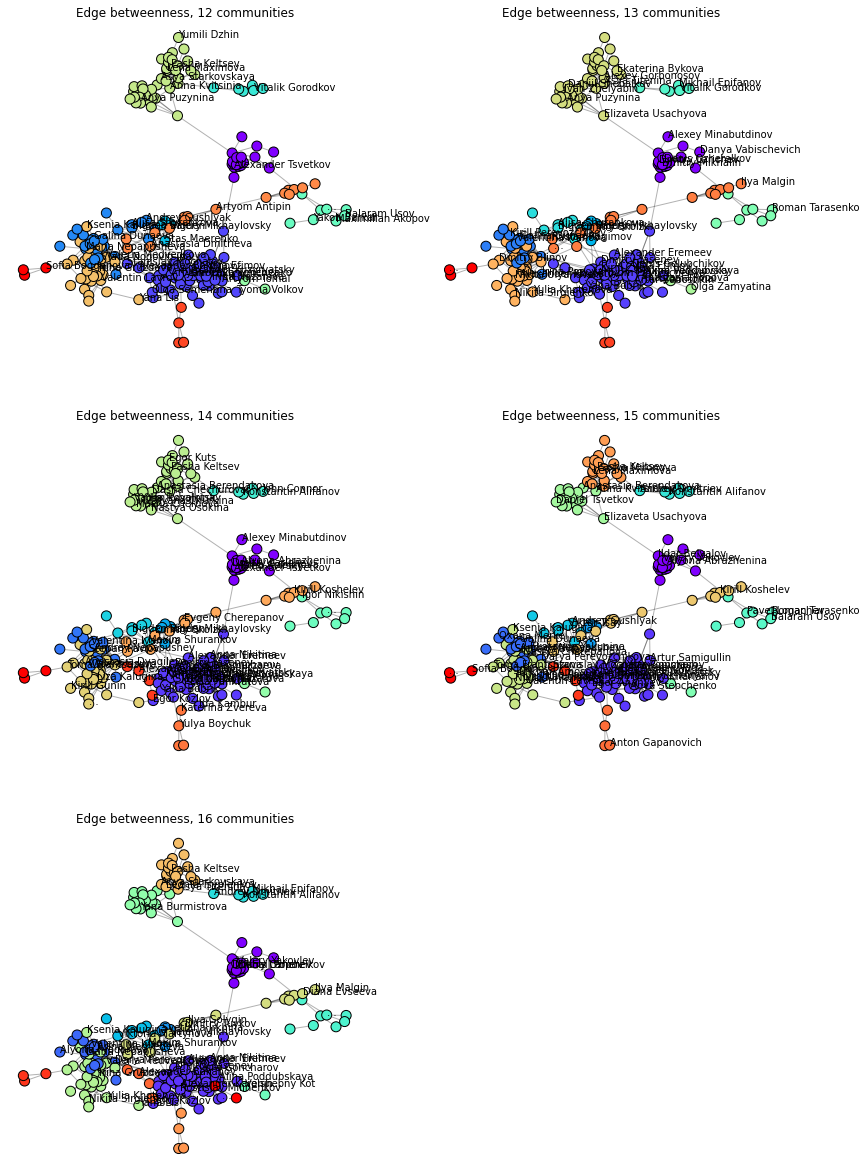

In [277]:
import random

def edge_betweenness(G, n):
    ### BEGIN SOLUTION
    com_gen = nx.algorithms.community.girvan_newman(G)
    labels = []
    for i in range(n):
        communities = next(com_gen)
        c_com = []
        for node in G.nodes:
            for i, c in enumerate(communities):
                if node in c:
                    c_com.append(i)
        labels.append(c_com)
    return np.array(labels)
    ### END SOLUTION

plt.figure(figsize=(7*2, 7*3))
colors = edge_betweenness(S[0], 15)[10:]
for i in range(colors.shape[0]):
    plt.subplot(3, 2, i+1)
    nx.draw_networkx_nodes(
        S[0], 
        pos,
        cmap=plt.cm.rainbow,
        node_color=colors[i], 
        node_size=100, 
        edgecolors='black'
    )
    for node, (x,y) in pos.items():
        if random.random() > 0.8:
            plt.text(x, y, S[0].nodes[node].get('name', ". ."), fontsize=10)
    nx.draw_networkx_edges(S[0], pos, alpha=0.3)
    plt.title('Edge betweenness, {} communities'.format(i+2+10))
    plt.axis('off')

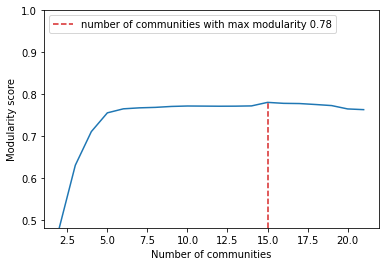

In [267]:
def edge_betw_modularity(G, n):
    com_gen = nx.algorithms.community.girvan_newman(G)
    modularities = []
    for i in range(n):
        communities = next(com_gen)
        modularity = nx.algorithms.community.modularity(G, communities)
        modularities.append(modularity)
    return np.array(modularities)

n_iterations = 20
modularity = edge_betw_modularity(S[0], n_iterations)

plt.figure(figsize=(6, 4))
plt.plot(np.arange(n_iterations)+2, modularity)
best_n = np.argmax(modularity) + 2
label = 'number of communities with max modularity {:.2f}'.format(max(modularity))
plt.plot(
    [best_n, best_n], [min(modularity), max(modularity)], 
    'k--', c='tab:red', 
    label=label
)
plt.ylabel('Modularity score')
plt.xlabel('Number of communities')
plt.legend(loc='upper left')
plt.ylim((modularity.min(), 1))
plt.show()

Text(0.5, 1.0, 'Ordered Laplacian eigenvalues')

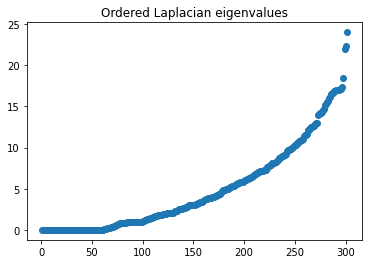

In [ ]:
def ring_lattice(n, k):
    G = nx.Graph()
    nodes = list(range(n))
    for i in range(1, int(k/2 + 1)):
        targets = nodes[i:] + nodes[:i]
        G.add_edges_from(zip(nodes, targets))
    return G

def pair_graph(n):
    G = nx.disjoint_union(nx.complete_graph(n), nx.complete_graph(n))
    G.add_edge(0, n)
    return G

def triple_graph(n):
    G = nx.disjoint_union_all(
        [nx.complete_graph(n), nx.complete_graph(n), nx.complete_graph(n)]
    )
    G.add_edge(0, n)
    G.add_edge(n, n*2)
    G.add_edge(n*2, 0)
    return G

def eig_laplacian(G):
    A = nx.to_numpy_array(G)
    D = np.diag([val for (_, val) in G.degree()])
    L = D - A
    v, w = np.linalg.eigh(L)
    return w, v



vecs, vals = eig_laplacian(G)
plt.scatter(np.arange(1, len(G) + 1), vals)
plt.title('Ordered Laplacian eigenvalues')

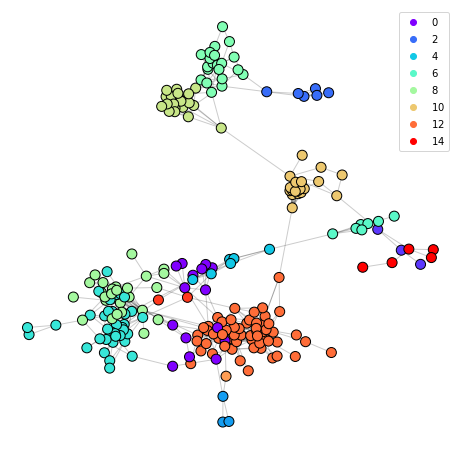

In [284]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
import scipy
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import requests
from zlib import adler32

def spectral_embedding(A, n_components):
    return sklearn.manifold.spectral_embedding(
        A, 
        norm_laplacian=True, 
        n_components=n_components, 
        drop_first=True
    )

def norm_laplacian(A):
    return np.diag(A.sum(axis=0) ** -0.5) @ (np.diag(A.sum(axis=0)) - A) @ np.diag(A.sum(axis=0) ** -0.5)

def spectral_clustering(G, n_clusters, n_components):
    A = nx.to_numpy_array(G)
    L = norm_laplacian(A)
    embedding = spectral_embedding(A, n_components)
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(embedding)
    return kmeans.labels_


plt.figure(figsize=(8, 8))
nodes = nx.draw_networkx_nodes(
    S[0], 
    pos,
    cmap=plt.cm.rainbow,
    node_color=spectral_clustering(S[0], 15, 10), 
    node_size=100, 
    linewidths=1, 
    edgecolors='black'
)
nx.draw_networkx_edges(
    S[0],
    pos,
    alpha=0.2,
    edge_color='black'
)
plt.axis('off')
plt.legend(*nodes.legend_elements())
plt.show()

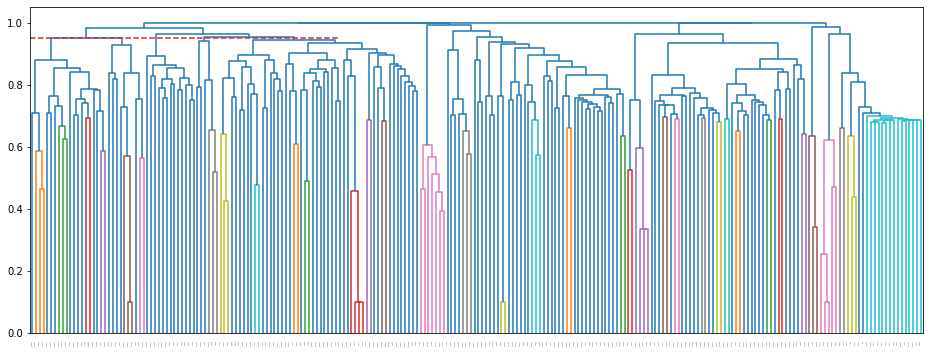

In [285]:
import sklearn
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

def simrank_distance(G):
    sim = nx.simrank_similarity(G)
    sim = np.array([[1 - sim[u][v] for v in G] for u in G])
    return sim.round(3)

distance = simrank_distance(S[0])
plt.figure(figsize=(16, 6))
linked = linkage(squareform(distance), 'complete')
dendrogram(linked, labels=list(S[0].nodes), 
           leaf_font_size=1)
plt.plot([0, 800], [0.95, 0.95], 'k--', c='tab:red')
plt.show()

In [286]:
def agglomerative_clustering(distance, max_distance):
    clustering = sklearn.cluster.AgglomerativeClustering(
        n_clusters=None,
        linkage='complete',
        affinity='precomputed',
        compute_full_tree=True,
        distance_threshold=max_distance,
    ).fit(distance)
    return clustering.labels_

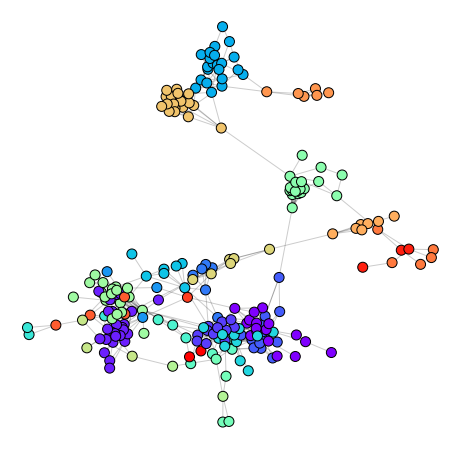

In [289]:
labels = agglomerative_clustering(distance, 0.90)
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(
    S[0], 
    pos,
    cmap=plt.cm.rainbow,
    node_color=labels, 
    node_size=100, 
    linewidths=1, 
    edgecolors='black'
)
nx.draw_networkx_edges(
    S[0],
    pos,
    alpha=0.2,
    edge_color='black'
)
plt.axis('off')
plt.show()

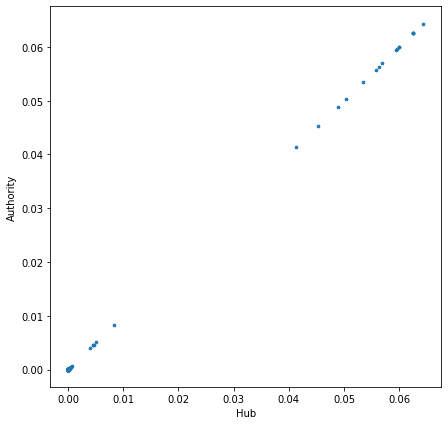

In [ ]:
def hits_polblogs(G):
    hub, auth = nx.hits(G)
    return hub, auth

hub, auth = hits_polblogs(G)
plt.figure(figsize=(7, 7))
plt.scatter(hub.values(), auth.values(), s=7)
plt.xlabel('Hub')
plt.ylabel('Authority')
plt.show()

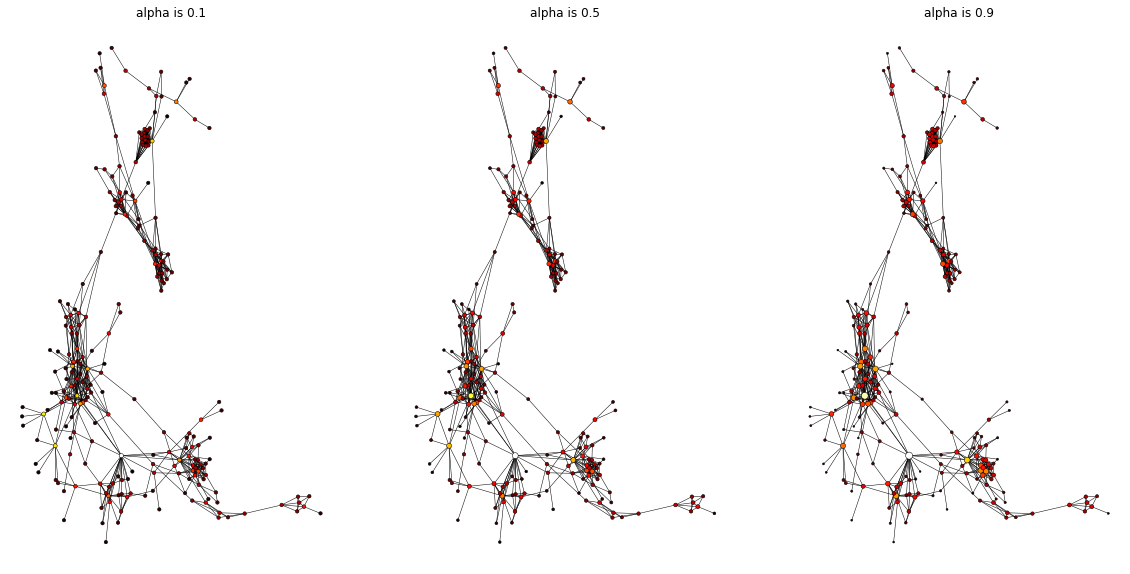

In [190]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.csgraph import reverse_cuthill_mckee
from scipy.sparse import csr_matrix
import requests
import seaborn as sns

def update_rank(rank, P, v, alpha):
    return (1 - alpha) * v + alpha * np.dot(P.T, rank)

'''Do not touch the cell'''
def page_rank(G, alpha, k):
    A = nx.to_numpy_array(G)
    P = transition_matrix(A)
    v = teleportation_vector(A)
    rank = np.ones(A.shape[0]) / A.shape[0]
    for _ in range(k):
        rank = update_rank(rank, P, v, alpha)
    return np.array(rank)

def transition_matrix(A):
    result = np.zeros((A.shape))
    for i in range(len(A)):
        count = 0
        for j in range(len(A[i])):
            if A[i, j] == 1:
                count += 1
        for j in range(len(result[i])):
            if A[i, j] == 1:
                result[i, j] = 1 / count
    return result

def teleportation_vector(A):
    n = len(A)
    result = [1 / n for _ in range(n)]
    return np.array(result)

plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G)

cases = [0.1, 0.5, 0.9]

for i, alpha in enumerate(cases):
    plt.subplot(1, 3, i+1)
    PR = page_rank(S[0], alpha, 10)
    nx.draw(S[0], 
            pos,
            width=0.5,
            linewidths=0.5,
            edgecolors='black',
            cmap=plt.cm.hot,
            node_size=PR*3e3,
            node_color=PR)
    plt.title('alpha is {}'.format(alpha))

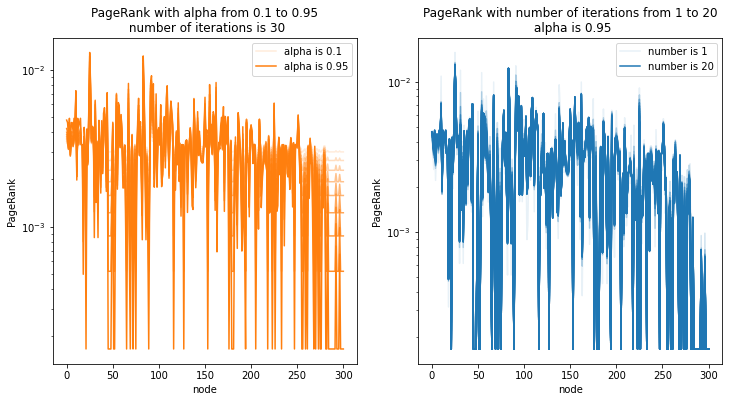

In [ ]:
def rank_matrix_by_alpha(G, alphas, k):
    result = [page_rank(G, alpha, k) for alpha in alphas]
    return np.array(result)

def node_color(node, rank, start_rgb, end_rgb):
    rank_old = rank[node]
    rank_new = sorted(rank)
    cur_nade = 0

    for i in range(len(rank_new)):
        if rank_new[i] == rank_old:
            cur_nade = i
            break

    ans_0 = abs(end_rgb[0] - start_rgb[0]) / (len(rank) - 1)
    ans_1 = abs(end_rgb[1] - start_rgb[1]) / (len(rank) - 1)
    ans_2 = abs(end_rgb[2] - start_rgb[2]) / (len(rank) - 1)

    channel_r = start_rgb[0] + np.sign(end_rgb[0] - start_rgb[0]) * ans_0 * (cur_nade)
    channel_g = start_rgb[1] + np.sign(end_rgb[1] - start_rgb[1]) * ans_1 * (cur_nade)
    channel_b = start_rgb[2] + np.sign(end_rgb[2] - start_rgb[2]) * ans_2 * (cur_nade)
    return np.array([channel_r, channel_g, channel_b])

def rank_matrix_by_number(G, alpha, k):
    result = [page_rank(G, alpha, i) for i in range(1, k+1)]
    return np.array(result)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
artists = []
for alpha in np.linspace(0.1, 0.95, 9):
    artists.append(plt.plot(page_rank(G, alpha, 30), alpha=alpha+0.05, c='tab:orange')[0])
plt.title('PageRank with alpha from 0.1 to 0.95\n number of iterations is 30')
plt.xlabel('node')
plt.ylabel('PageRank')
plt.yscale('log')
plt.legend([artists[0], artists[-1]], ['alpha is 0.1', 'alpha is 0.95'])

plt.subplot(1, 2, 2)
artists = []
for i in np.arange(1, 20):
    artists.append(plt.plot(page_rank(G, 0.95, i), alpha=min(i*0.1, 1), c='tab:blue')[0])
plt.title('PageRank with number of iterations from 1 to 20\n alpha is 0.95')
plt.xlabel('node')
plt.ylabel('PageRank')
plt.yscale('log')
plt.legend([artists[0], artists[-1]], ['number is 1', 'number is 20'])

plt.show()

In [137]:
def centralities(G):
    """
    Calculate degree, closeness, betweenness centralities of the graph
    
    :param G: Moscow undeground graph
    :return: mapping of centrality names (degree, closeness, betweenness) to np.array of its values
    """
    ### BEGIN SOLUTION
    return {
        'degree': np.array([dc for dc in nx.degree_centrality(G).values()]),
        'closeness': np.array([dc for dc in nx.closeness_centrality(G).values()]),
        'betweenness': np.array([dc for dc in nx.betweenness_centrality(G).values()])
    }
    ### END SOLUTION

In [176]:
def top10_centralities(G):
    """
    Create table of top 10 nodes by degree, closeness, betweenness centralities
    
    :param G: graph of Moscow undeground
    :return: mapping of station name to the dataframe with columns (station, line, centrality)
    """
    ### BEGIN SOLUTION
    cases = [['degree', nx.degree_centrality(G)], 
             ['closeness', nx.closeness_centrality(G)], 
             ['betweenness', nx.betweenness_centrality(G)]]
    dfs = {}
    for title, centrality in cases:
        top = sorted(centrality.items(), key=lambda i: i[1], reverse=True)[:10]
        names = []
        city = []
        for i, val in top:
            names.append(G.nodes[i].get('name'))
        for i, val in top:
            city.append(G.nodes[i].get('city'))
        centr_value = [val for i, val in top]
        dfs[title] = pd.DataFrame({'name': names,
                                   'city': city,
                                   'value': centr_value
                                   })
    return dfs
    ### END SOLUTION

In [182]:
dfs = top10_centralities(S[0])
print('closeness centralities')
dfs['closeness']

closeness centralities


name         city     value
0      Alexander Meshkov       Moscow  0.230080
1                   None         None  0.227139
2      Alexander Vovchek            0  0.225146
3         Vadim Kirienko  Kaliningrad  0.221053
4  Alexander Kuzyryatsky      Polessk  0.220841
5            Fed Lebedev            0  0.220630
6            Ilya Efimov    Amsterdam  0.217514
7         Yura Goncharov  Kaliningrad  0.217514
8   Darya Perevozchikova  Kaliningrad  0.214684
9          Dmitry Burkin        Gusev  0.212121

In [183]:
print('degree centralities')
dfs['degree']

degree centralities


name         city     value
0  Darya Perevozchikova  Kaliningrad  0.095238
1     Alexander Meshkov       Moscow  0.095238
2        Ildar Belyalov       Moscow  0.090909
3    Valeria Medvedkova            0  0.073593
4     Renat Zayashnikov       Moscow  0.069264
5        Anna Anisimova            0  0.069264
6      Denis Ozherelkov       Moscow  0.069264
7       Dmitry Mikhalin       Moscow  0.069264
8      Tatyana Churkina       Moscow  0.069264
9       Kolya Myasnikov  Arkhangelsk  0.069264

In [184]:
print('betweenness centralities')
dfs['betweenness']

betweenness centralities


name         city     value
0        Grigory Petrov       Moscow  0.446538
1           Igor Slinko       Moscow  0.443474
2        Ildar Belyalov       Moscow  0.407629
3  Darya Perevozchikova  Kaliningrad  0.374932
4   Elizaveta Usachyova       Moscow  0.320949
5     Alexander Meshkov       Moscow  0.268242
6        Vadim Kirienko  Kaliningrad  0.224723
7           Ilya Efimov    Amsterdam  0.213771
8    Valeria Medvedkova            0  0.195769
9                  None         None  0.120033